In [1]:
import pandas as pd
import scipy, researchpy
from researchpy import ttest
import os, glob
import numpy as np
from pathlib import Path
import os, shutil

In [2]:
root = fold_1 = Path('/anvar/public_datasets/preproc_study/gbm/inference/6_hist/predictions_best_epoch=84-dice_mean=66_80_task=31.1_fold=1_tta')

In [3]:
os.listdir(fold_1)

['TCGA-02-0006.npy.npz',
 'TCGA-02-0027.npy.npz',
 'TCGA-02-0011.npy.npz',
 'TCGA-02-0009.npy.npz',
 'TCGA-02-0033.npy.npz']

In [4]:
subjects_paths = [f.path for f in os.scandir('/anvar/public_datasets/preproc_study/gbm/3a_atlas/') if f.is_dir()]
subjects = [f.split('/')[-1] for f in subjects_paths]

len(subjects)

102

In [10]:
infer_path = '/anvar/public_datasets/preproc_study/gbm/inference/native_space/'
pred_path = '/anvar/public_datasets/preproc_study/gbm/inference/'
infer_dir = infer_path +'2a_interp'
pred_dir = pred_path +'2a_interp'

os.listdir(infer_dir)

['fold=0', 'fold=2', 'fold=1']

### TCIA GBM check

In [7]:
def check_package_of_files(infer_dir, list_subj = subjects):
    for fold in [0,1,2]:
        list_fold_0 = os.listdir(infer_dir + '/fold={}'.format(fold))
        list_fold_0 = [i[:-4] for i in list_fold_0]
        print( 'Fold ', fold, set(subjects) - set(list_fold_0))
        print(len(list_fold_0))

## 1. 2a interp

In [85]:
infer_path = '/anvar/public_datasets/preproc_study/gbm/inference/native_space/'
pred_path = '/anvar/public_datasets/preproc_study/gbm/inference/'
infer_dir = infer_path +'2a_interp'
pred_dir = pred_path +'2a_interp'

os.listdir(infer_dir)
check_package_of_files(infer_dir, list_subj = subjects)

Fold  0 set()
102
Fold  1 set()
102
Fold  2 set()
102


In [28]:
for i in os.listdir(pred_dir +'/predictions_best_epoch=76-dice_mean=68_92_task=22_fold=0_tta'):
    for j in ['TCGA-02-0116', 'TCGA-02-0087', 'TCGA-76-6656', 'TCGA-12-3650']:
        if j in i:
            print(i)
            os.rmfile(pred_dir +'/predictions_best_epoch=76-dice_mean=68_92_task=22_fold=0_tta/' + i)

TCGA-76-6656.npy.npz
TCGA-12-3650.npy.npz
TCGA-02-0116.npy.npz
TCGA-02-0087.npy.npz


In [33]:
len(os.listdir(pred_dir +'/predictions_best_epoch=76-dice_mean=68_92_task=22_fold=0_tta'))

102

In [21]:
os.listdir(infer_dir)

['fold=0', 'fold=2', 'fold=1']

In [13]:
import shlex, time, subprocess
base_command = """scp gpu_server_kate:/mnt/experiments/gbm_infer/2a_interp/predictions_best_epoch=76-dice_mean=68_92_task=22_fold=0_tta/{subject}.npy.npz /anvar/public_datasets/preproc_study/gbm/inference/2a_interp/predictions_best_epoch=76-dice_mean=68_92_task=22_fold=0_tta/"""
for patient in ['TCGA-02-0116', 'TCGA-02-0087', 'TCGA-76-6656', 'TCGA-12-3650']:
    print(patient)
    command_to_run = base_command.format(subject = patient)
    command_to_run = shlex.split(command_to_run)
    process = subprocess.Popen(command_to_run,shell=False)
    time.sleep(2)

TCGA-02-0116
TCGA-02-0087
TCGA-76-6656
TCGA-12-3650


### 2. 3a atlas

In [88]:
infer_dir = infer_path +'3a_atlas'
pred_dir = pred_path +'3a_atlas'
check_package_of_files(infer_dir, list_subj = subjects)

Fold  0 {'TCGA-06-0142', 'TCGA-08-0520', 'TCGA-02-0037'}
99
Fold  1 set()
102
Fold  2 set()
102


## 3. 4a resamp

In [25]:
infer_dir = infer_path +'4a_resamp'
pred_dir = pred_path +'7a_resample'
check_package_of_files(infer_dir, list_subj = subjects)

Fold  0 set()
102
Fold  1 set()
102
Fold  2 set()
102


### 4. 3a_atlas_aug

In [26]:
infer_dir = infer_path +'3a_atlas_aug'
pred_dir = pred_path +'3a_atlas_aug_300'
check_package_of_files(infer_dir, list_subj = subjects)

Fold  0 set()
102
Fold  1 set()
102
Fold  2 set()
102


## 5. 4a resamp aug 



In [28]:
infer_dir = infer_path +'4a_resamp_aug'
pred_dir = pred_path +'7a_resaple_aug_300'
check_package_of_files(infer_dir, list_subj = subjects)

Fold  0 set()
102
Fold  1 set()
102
Fold  2 set()
102


### 6. 5 ss shared

In [103]:
infer_dir = infer_path +'5_ss'
pred_dir = pred_path +'5_ss_shared'
check_package_of_files(infer_dir, list_subj = subjects)

Fold  0 set()
102
Fold  1 {'TCGA-76-6280', 'TCGA-06-0646', 'TCGA-06-0139', 'TCGA-08-0520', 'TCGA-06-0644', 'TCGA-06-0130', 'TCGA-76-6285', 'TCGA-06-0138', 'TCGA-76-4934', 'TCGA-02-0087', 'TCGA-02-0034', 'TCGA-76-4935', 'TCGA-06-0185', 'TCGA-06-0164', 'TCGA-02-0106', 'TCGA-19-0963', 'TCGA-76-6664', 'TCGA-02-0046', 'TCGA-02-0037', 'TCGA-08-0392', 'TCGA-06-0142', 'TCGA-02-0011', 'TCGA-76-6656', 'TCGA-19-5954', 'TCGA-06-0240', 'TCGA-14-3477', 'TCGA-19-5958', 'TCGA-02-0085', 'TCGA-76-6663', 'TCGA-06-5417', 'TCGA-06-0238', 'TCGA-06-0187', 'TCGA-06-0149', 'TCGA-76-6193'}
68


FileNotFoundError: [Errno 2] No such file or directory: '/anvar/public_datasets/preproc_study/gbm/inference/native_space/5_ss/fold=2'

## 7. 3b n4

In [35]:
os.listdir('/anvar/public_datasets/preproc_study/gbm/inference/')

['7a_resample_aug_300',
 '3b_n4',
 '5_ss_shared',
 '2a_interp_aug',
 '2a_interp',
 '1_reg_aug',
 '3c_n4_susan',
 '3a_atlas_aug_300',
 'native_space',
 '7a_resample',
 'labels',
 '3a_susan',
 '2b_n4',
 '2c_n4_susan',
 'metrcis',
 '1_reg',
 '6_hist',
 'gbm_3a_atlas']

In [36]:
infer_dir = infer_path + '3b_n4'
pred_dir = pred_path +'3b_n4'
check_package_of_files(infer_dir, list_subj = subjects)

Fold  0 set()
102
Fold  1 set()
102
Fold  2 set()
102


###  8. 3d susan

In [107]:
infer_dir = infer_path + '3d_susan'
pred_dir = pred_path +'3a_susan'
check_package_of_files(infer_dir, list_subj = subjects)

Fold  0 set()
102
Fold  1 set()
102
Fold  2 set()
102


### 9. 6 hist 

In [97]:
infer_dir = infer_path + '6_hist'
pred_dir = pred_path +'6_hist'
check_package_of_files(infer_dir, list_subj = subjects)

Fold  0 set()
102
Fold  1 set()
102
Fold  2 set()
102


In [64]:
base_command = """scp gpu_server_kate:/mnt/experiments/gbm_infer/6_histogram_fold_2/predictions_best_epoch=84-dice_mean=64_34_task=31.2_fold=2_tta/{subject}.npy /anvar/public_datasets/preproc_study/gbm/inference/6_hist/predictions_best_epoch=84-dice_mean=64_34_task=31.2_fold=2_tta/"""
for patient in ['TCGA-06-0142', 'TCGA-06-0646', 'TCGA-08-0520', 'TCGA-02-0046', 'TCGA-02-0037']:
    print(patient)
    command_to_run = base_command.format(subject = patient)
    command_to_run = shlex.split(command_to_run)
    process = subprocess.Popen(command_to_run,shell=False)
    time.sleep(3)

TCGA-06-0142


scp: /mnt/experiments/gbm_infer/6_histogram_fold_2/predictions_best_epoch=84-dice_mean=64_34_task=31.2_fold=2_tta/TCGA-06-0142.npy: No such file or directory


TCGA-06-0646
TCGA-08-0520


scp: /mnt/experiments/gbm_infer/6_histogram_fold_2/predictions_best_epoch=84-dice_mean=64_34_task=31.2_fold=2_tta/TCGA-08-0520.npy: No such file or directory


TCGA-02-0046
TCGA-02-0037


scp: /mnt/experiments/gbm_infer/6_histogram_fold_2/predictions_best_epoch=84-dice_mean=64_34_task=31.2_fold=2_tta/TCGA-02-0037.npy: No such file or directory


### 6. Mask applied as postprocessing in native space

In [6]:
import os
infer_path = '/anvar/public_datasets/preproc_study/gbm/inference/native_space/'
pred_path = '/anvar/public_datasets/preproc_study/gbm/inference/'

In [92]:
import numpy as np
data_ss = np.load(infer_path +'/5_ss/fold=0/TCGA-02-0086.npz')
data_ss_native = np.load(infer_path +'/5_ss_mask_native/fold=0/TCGA-02-0086.npz')
data_atlas = np.load(infer_path +'/3a_atlas/fold=0/TCGA-02-0086.npz')
data_mask = ants.image_read('/anvar/public_datasets/preproc_study/gbm/1_reg_ss_shared/TCGA-02-0086/CT1_mask.nii.gz')
data_data = ants.image_read('/anvar/public_datasets/preproc_study/gbm/1_reg_ss_shared/TCGA-02-0086/CT1.nii.gz')
data_old = ants.image_read('/anvar/public_datasets/preproc_study/gbm/3a_atlas/TCGA-02-0086/CT1.nii.gz')
data_labels = ants.image_read('/anvar/public_datasets/preproc_study/gbm/inference/labels/TCGA-02-0086_seg.nii.gz')

In [93]:
data_old.get_orientation(), data_data.get_orientation(), data_labels.get_orientation(), 

('LPI', 'RPI', 'RAI')

In [96]:
np.allclose(np.round(data_atlas['arr_0'].transpose(0,3,2,1)[1],0).astype(int),
        np.round(data_ss_native['arr_0'].transpose(0,3,2,1)[1],0).astype(int))

False

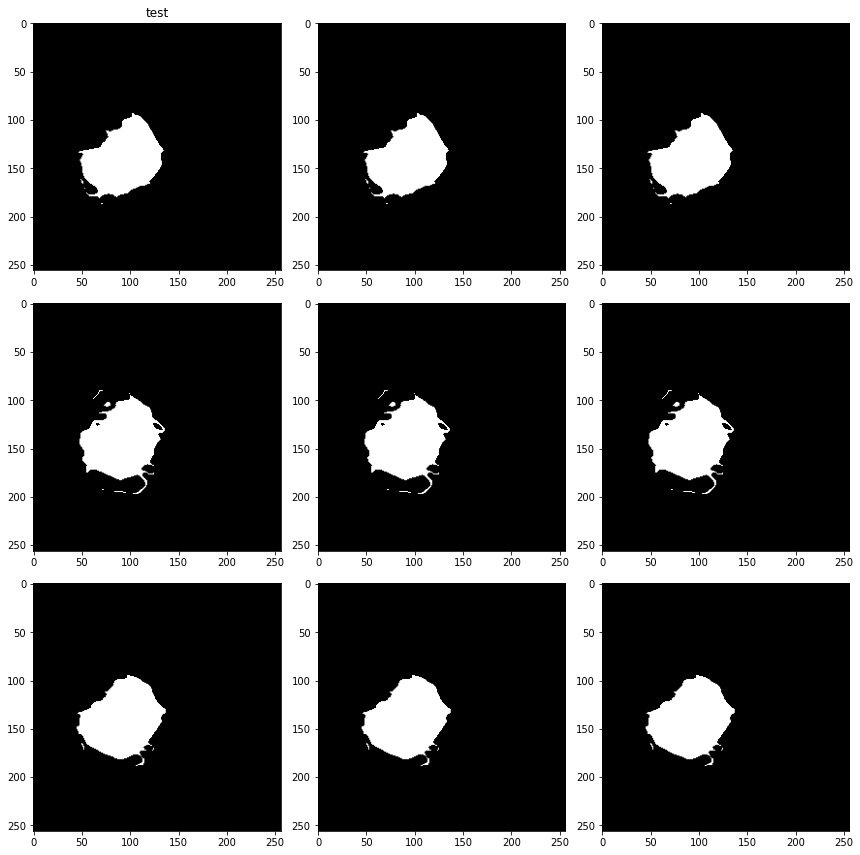

In [95]:
plot_qc(np.round(data_atlas['arr_0'].transpose(0,3,2,1)[1],0).astype(int),
        np.round(data_ss_native['arr_0'].transpose(0,3,2,1)[1],0).astype(int))

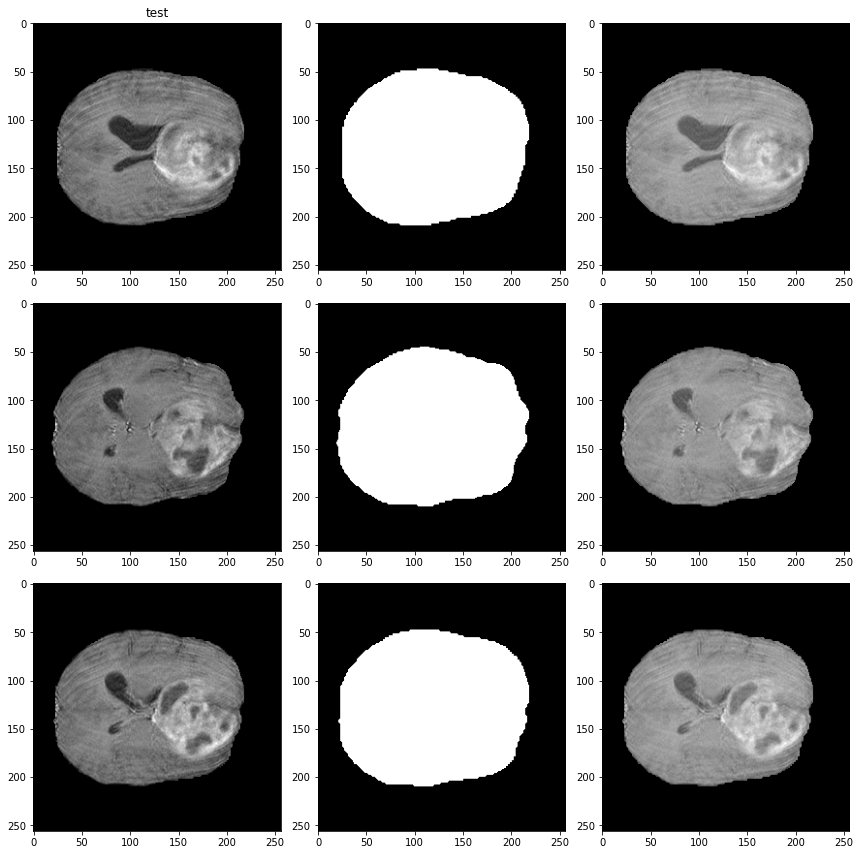

In [89]:
plot_qc(data_data.numpy(),
        data_mask.numpy())

In [30]:
data_mask.numpy().shape

(256, 256, 24)

In [68]:
np.unique(data_mask.numpy())

array([0., 1.], dtype=float32)

In [77]:
data_labels.get_orientation

functools.partial(<bound method get_orientation of ANTsImage (RAI)
	 Pixel Type : float (float32)
	 Components : 1
	 Dimensions : (256, 256, 24)
	 Spacing    : (0.8594, 0.8594, 6.5)
	 Origin     : (-112.497, -142.986, -63.8866)
	 Direction  : [ 1.      0.      0.      0.      0.9998  0.0189  0.     -0.0189  0.9998]
>)

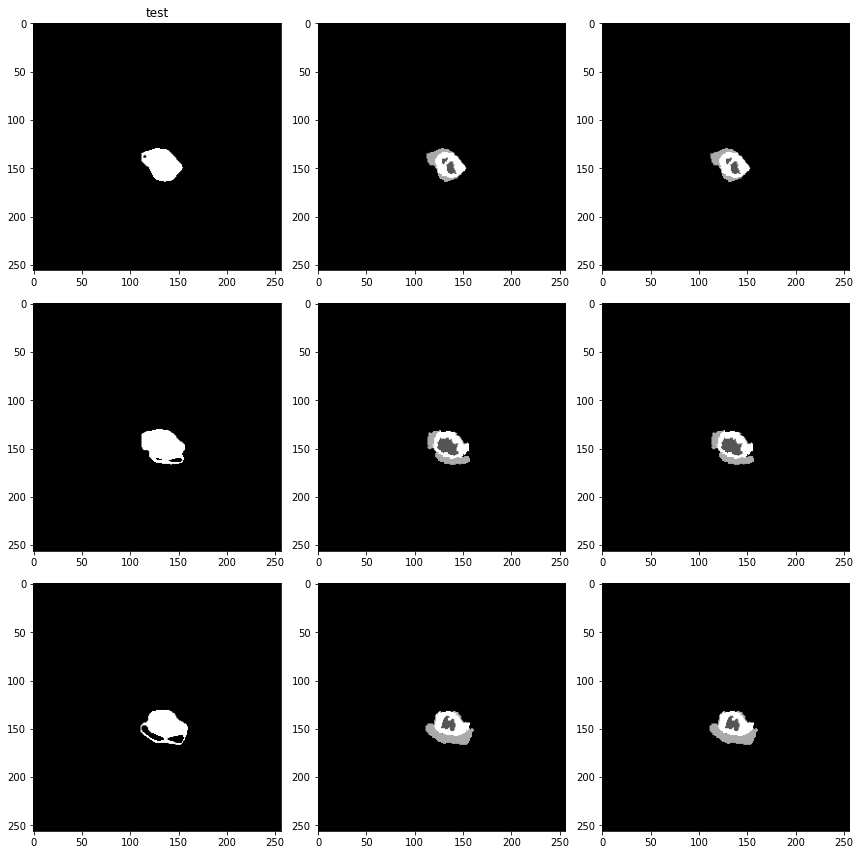

In [75]:
plot_qc(np.round(data_atlas['arr_0'].transpose(0,3,2,1)[1],0).astype(int),
        data_labels.numpy())

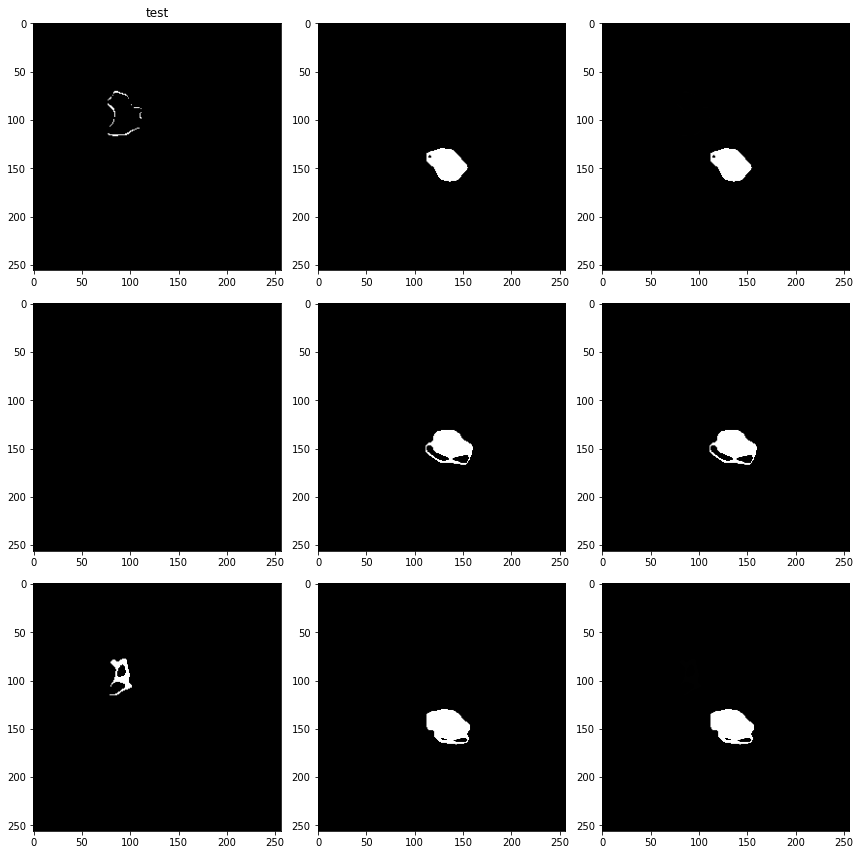

In [62]:
plot_qc(np.round(data_ss_native['arr_0'].transpose(0,3,2,1)[1],0).astype(int), 
        np.round(data_atlas['arr_0'].transpose(0,3,2,1)[1],0).astype(int))

In [11]:
import ants

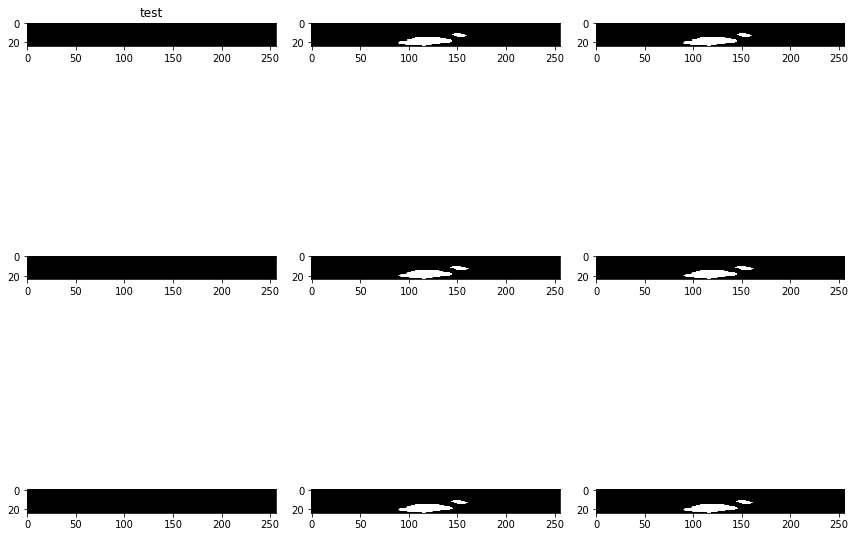

In [12]:
import matplotlib.pyplot as plt
def plot_qc(image, mask, patient_id = 'test'):
    fig, axs = plt.subplots(3,3,figsize=(12,12))
    idx = np.argsort(mask.sum(axis=(0,1)))[-3:]
    for i in range(3):
        axs[i, 0].imshow(image[..., idx[i]], cmap='gray')
        axs[i, 1].imshow(mask[..., idx[i]], cmap='gray')
        axs[i, 2].imshow(image[..., idx[i]]+200*mask[..., idx[i]], cmap='gray')
    axs[0,0].set_title(patient_id)
    plt.tight_layout()
    plt.plot()
    
plot_qc(np.round(data_mask['arr_0'][0],0).astype(int), np.round(data_ss['arr_0'][0],0).astype(int))